In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST("", train=True, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)

testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [2]:
import torch.nn as nn
import torch.nn.functional as F

In [3]:
#Create neural network

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        #self.fc1 fully connected layer => nn.Linear(input, output) flattened layer neural network
        self.fc1 = nn.Linear(784, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        #each argument takes in number of neurons from the previous layer. Last output layer has 10 possible classifications (0-9)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
       
    
        
        
net = Net()

print(net)



Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [4]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        #data is a batch of 10
        X, y = data
        net.zero_grad()
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output, y)
        loss.backward() #backpropogate
        optimizer.step() #adjust weights
    print(loss)
    


tensor(0.1348, grad_fn=<NllLossBackward>)
tensor(0.0045, grad_fn=<NllLossBackward>)
tensor(0.9585, grad_fn=<NllLossBackward>)


In [15]:
total = 0
correct = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,28*28))
        for index, i in enumerate(output):
            if torch.argmax(i) == y[index]:
                correct += 1
            total +=1
print("Accuracy:" ,correct/total)
            

Accuracy: 0.9583


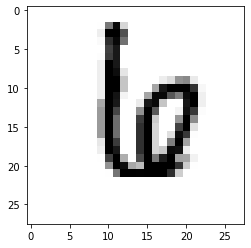

Predicted: 6


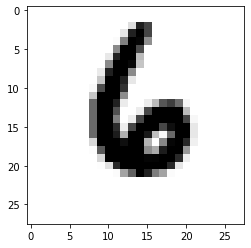

Predicted: 6


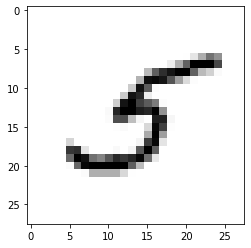

Predicted: 5


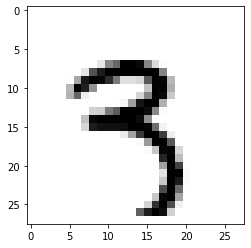

Predicted: 3


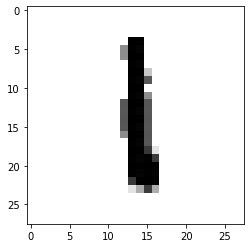

Predicted: 1


In [19]:
import matplotlib.pyplot as plt
import numpy as np
    

for i in range(5):
    plt.imshow(X[i].view(28,28),cmap = plt.cm.gray_r)
    plt.show()

    print(f'Predicted: {np.asarray(torch.argmax(output[i]))}')
